In [63]:
import geopandas as gpd 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime

In [102]:
# Replace 'path/to/your/csv/file.csv' with the actual path to your CSV file
data = pd.read_csv('/home/sallyfons/MLEE/italy_heartquakes_1985_2022.csv')

data['datetime'] = pd.to_datetime(data['date'], format='%Y-%m-%d %H:%M:%S')
data['date_num'] = data['datetime'].apply(lambda x: datetime.timestamp(x))

# Print the data
print(data)
# Checking for missing values
print(data.isnull().sum())

                      date  magnitude  depth  latitude  longitude  \
0      1985-01-02 19:39:30        4.0     10     48.09       7.06   
1      1985-01-02 23:57:43        2.6      6     41.72      13.94   
2      1985-01-03 01:46:16        2.5      6     41.68      13.93   
3      1985-01-04 17:57:40        3.8     10     46.16       7.17   
4      1985-01-05 00:59:54        3.7      5     45.34       6.64   
...                    ...        ...    ...       ...        ...   
102082 2022-12-31 07:17:03        2.0      7     44.01      13.32   
102083 2022-12-31 07:23:49        2.1    153     38.66      15.48   
102084 2022-12-31 09:48:30        2.3     10     44.17      12.32   
102085 2022-12-31 10:30:37        2.3     16     44.20      12.34   
102086 2022-12-31 12:41:16        2.3     14     42.84      13.40   

            date_num  
0       4.735392e+08  
1       4.735547e+08  
2       4.735612e+08  
3       4.737059e+08  
4       4.737312e+08  
...              ...  
102082  1.

In [109]:
# Replace 'path/to/your/csv/file.csv' with the actual path to your CSV file
data = pd.read_csv('/home/sallyfons/MLEE/turkey_earthquakes(1915-2021).csv')

# Translate the header names from Turkish to English
data = data.rename(columns={'Deprem Kodu': 'Earthquake Code', 'Olus tarihi': 'date', 'Olus zamani': 'time', 'Enlem': 'latitude', 'Boylam': 'longitude', 'Derinlik': 'depth', 'Tip': 'Type (eq/ex)', 'Yer': 'Location'})


# Convert the date and time columns to datetime format
data['datetime'] = pd.to_datetime(data['date'] + ' ' + data['time'], format='%d/%m/%Y %H:%M:%S')

# Sort the data by date
data = data.sort_values('datetime', ascending=True)
# Filter out rows with missing or invalid dates

data = data[data['datetime'].notnull()]

# Convert the datetime column to numeric format
data['date_num'] = data['datetime'].apply(lambda x: datetime.timestamp(x))



print(f' Numeric dates that are NaN: {data["date_num"].isnull().sum()}')
print(f' Latitude that are NaN: {data["latitude"].isnull().sum()}')
print(f' Moment Magnitude that are NaN or 0: {(data["Mw"].isnull() | (data["Mw"] == 0)).sum()}')
print(f' Local Magnitude that are NaN or 0: {(data["ML"].isnull() | (data["ML"] == 0)).sum()}')
count = ((data['Mw'].isnull() | (data['Mw'] == 0)) & (data['ML'].isnull() | (data['ML'] == 0))).sum()
print(f'Number of rows where both "Mw" and "ML" are either 0 or NaN: {count}')
print(f' Depths that are NaN: {data["depth"].isnull().sum()}')

#Due to high number of NaN in Mw, ML will be used. Also the same one as in the Italy Earthquake Prediction model
data = data.rename(columns={'ML': 'magnitude'})
# Drop rows where the values of ML are NaN
data = data.dropna(subset=['magnitude'], how='any')

# Drop rows where the values of ML are 0
data = data[data['magnitude'] != 0]

# Print the data
print(data)
print(f' Moment Magnitude that are NaN or 0: {(data["Mw"].isnull() | (data["Mw"] == 0)).sum()}')

 Numeric dates that are NaN: 0
 Latitude that are NaN: 0
 Moment Magnitude that are NaN or 0: 12894
 Local Magnitude that are NaN or 0: 8491
Number of rows where both "Mw" and "ML" are either 0 or NaN: 8440
 Depths that are NaN: 0
          No  Earthquake Code        date      time  latitude  longitude  \
6087   17370     1.915020e+13  14/02/1915  08:20:01   38.8000    42.5000   
9099   17369     1.915020e+13  28/02/1915  12:47:02   37.7000    43.1000   
4392   17368     1.915040e+13  01/04/1915  05:41:05   40.5000    44.5000   
3745   17367     1.915050e+13  19/05/1915  04:48:02   37.6200    39.4700   
4672   17365     1.915120e+13  25/12/1915  06:06:09   36.4700    36.1400   
...      ...              ...         ...       ...       ...        ...   
14315      5     2.020120e+13  27/12/2020  20:08:37   38.4172    39.1482   
9683       4     2.020120e+13  30/12/2020  13:40:12   37.7960    26.4165   
13291      3     2.020120e+13  30/12/2020  18:45:13   36.4918    28.7092   
694      

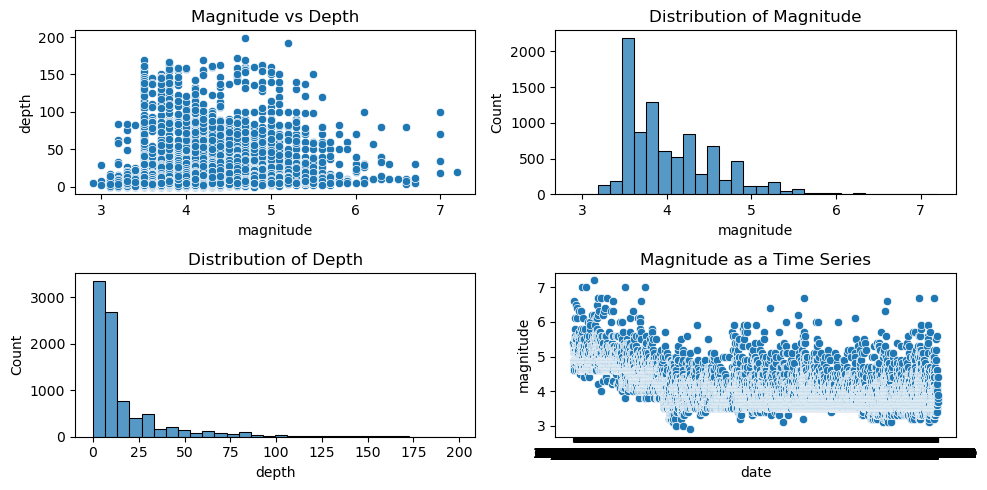

In [111]:
# Create a figure with subplots
fig, axes = plt.subplots(2, 2, figsize=(10, 5))

# Scatter plot of magnitude vs depth
sns.scatterplot(x='magnitude', y='depth', data=data, ax=axes[0, 0])
axes[0, 0].set_title('Magnitude vs Depth')

# Distribution plot of magnitude
sns.histplot(data['magnitude'], bins=30, ax=axes[0, 1])
axes[0, 1].set_title('Distribution of Magnitude')

# Distribution plot of depth
sns.histplot(data['depth'], bins=30, ax=axes[1, 0])
axes[1, 0].set_title('Distribution of Depth')

# Scatter plot of magnitude as a time series
sns.scatterplot(x='date', y='magnitude', data=data, ax=axes[1, 1])
axes[1, 1].set_title('Magnitude as a Time Series')

# Adjust the spacing between subplots
plt.tight_layout()

# Show the figure
plt.show()

/tmp/ipykernel_2549/3719209313.py:5: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


RuntimeError: No mappable was found to use for colorbar creation. First define a mappable such as an image (with imshow) or a contour set (with contourf).

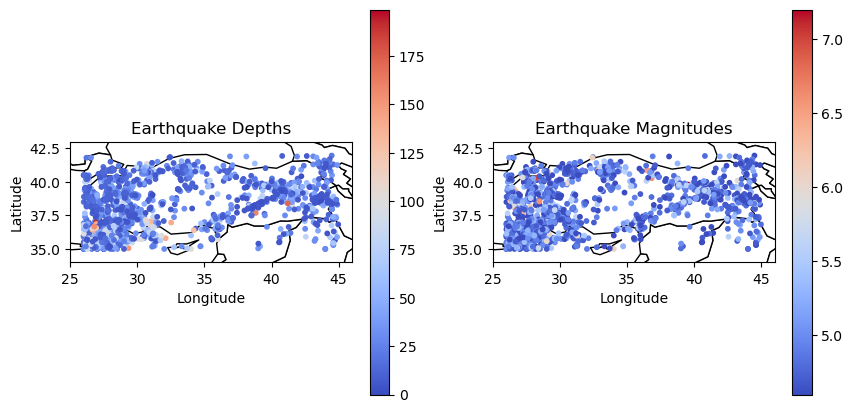

In [110]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Load the country borders shapefile
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Create a GeoDataFrame from the latitude and longitude columns
geometry = gpd.points_from_xy(data['longitude'], data['latitude'])
gdf_eq = gpd.GeoDataFrame(data, geometry=geometry)

# Create a figure with subplots
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

# Set the x-axis and y-axis limits based on the data
ax[0].set_xlim(data['longitude'].min() - 1, data['longitude'].max() + 1)
ax[0].set_ylim(data['latitude'].min() - 1, data['latitude'].max() + 1)
ax[1].set_xlim(data['longitude'].min() - 1, data['longitude'].max() + 1)
ax[1].set_ylim(data['latitude'].min() - 1, data['latitude'].max() + 1)
# Plot the country borders as a background map
world.plot(ax=ax[0], color='white', edgecolor='black')
world.plot(ax=ax[1], color='white', edgecolor='black')
# Set the aspect ratio of the plot
ax[0].set_aspect('equal')
ax[1].set_aspect('equal')
# Plot the data points

# Filter the data to include only magnitudes higher than 4.5
filtered_data = gdf_eq[gdf_eq['magnitude'] > 4.5]

# Plot the filtered data points
filtered_data.plot(ax=ax[0], column='depth', cmap='coolwarm', markersize=10, legend=True)
filtered_data.plot(ax=ax[1], column='magnitude', cmap='coolwarm', markersize=10, legend=True)
#gdf_eq.plot(ax=ax[0], column='depth', cmap='coolwarm', markersize= 10 , legend=True)
#gdf_eq.plot(ax=ax[1], column='magnitude', cmap='coolwarm', markersize=10, legend=True)

# Set the plot title and axis labels
ax[0].set_title('Earthquake Depths')
ax[0].set_xlabel('Longitude')
ax[0].set_ylabel('Latitude')
ax[1].set_title('Earthquake Magnitudes')
ax[1].set_xlabel('Longitude')
ax[1].set_ylabel('Latitude')

# Show the colorbar
plt.colorbar(ax= ax[0], label='Depth')
plt.colorbar(ax=ax[1], label='Magnitude')

# Show the plot
plt.show()


In [103]:
# Define the extent of the specific area
min_latitude = 40.0
max_latitude = 44.0
min_longitude = 10.0
max_longitude = 15.0

# Filter the 'data' DataFrame to include only the points within the specific area
data = data[(data['latitude'] >= min_latitude) & (data['latitude'] <= max_latitude) & (data['longitude'] >= min_longitude) & (data['longitude'] <= max_longitude)]

# Print the points inside the area
print(data)


                      date  magnitude  depth  latitude  longitude  \
1      1985-01-02 23:57:43        2.6      6     41.72      13.94   
2      1985-01-03 01:46:16        2.5      6     41.68      13.93   
6      1985-01-05 09:32:41        2.6      3     43.06      13.14   
8      1985-01-06 04:52:23        2.4     10     43.36      12.54   
9      1985-01-06 05:19:36        2.3     10     43.37      12.54   
...                    ...        ...    ...       ...        ...   
102071 2022-12-29 20:31:30        2.2      8     43.99      13.29   
102075 2022-12-30 01:54:46        2.3      9     43.96      13.29   
102077 2022-12-30 14:22:33        2.0     28     43.09      14.16   
102081 2022-12-31 01:37:35        3.1      9     43.98      13.31   
102086 2022-12-31 12:41:16        2.3     14     42.84      13.40   

            date_num  
1       4.735547e+08  
2       4.735612e+08  
6       4.737620e+08  
8       4.738315e+08  
9       4.738332e+08  
...              ...  
102071  1.

In [114]:
from datetime import timedelta
#Cut-off Magnitude
cutoff_mag = 5.5
min_mag = 3.5

# Add a new column 'HighMagnitude' based on the magnitude
data['HighMagnitude'] = data['magnitude'].apply(lambda x: 1 if x >= cutoff_mag else 0)

# Print the updated DataFrame
print(data['HighMagnitude'].value_counts())

#Define a function to check if there is a high magnitude earthquake in the next 7 days
def check_next_week_high_magnitude(row):
    next_week = row['datetime'] + timedelta(days=7)
    next_week_data = data[(data['datetime'] > row['datetime']) & (data['datetime'] <= next_week)]
    return 1 if any(next_week_data['magnitude'] >= cutoff_mag) else 0


# Define a function to compute the maximum magnitude in the last 7 days
def compute_max_magnitude(row):
    last_week = row['datetime'] - timedelta(days=7)
    last_week_data = data[(data['datetime'] > last_week) & (data['datetime'] <= row['datetime'])]
    return last_week_data['magnitude'].max()



# Apply the function to create the 'NextWeekHighMagnitude' column
data['NextWeekHighMagnitude'] = data.apply(check_next_week_high_magnitude, axis=1)

#Apply the function to create the Max Magnitude column 'x6
data['x6'] = data.apply(compute_max_magnitude, axis=1)
# Add a new column 'TimeElapsed' that calculates the time elapsed between each event
data['TimeElapsed'] = data['date_num'].diff()
data['TimeElapsed'] = data['TimeElapsed'].fillna(0)

# Print the updated DataFrame
print(data.head())

# Print the updated DataFrame
print(data['NextWeekHighMagnitude'].value_counts())
print(data[10100:10107])




HighMagnitude
0    8702
1     177
Name: count, dtype: int64
         No  Earthquake Code        date      time  latitude  longitude  \
6087  17370     1.915020e+13  14/02/1915  08:20:01     38.80      42.50   
9099  17369     1.915020e+13  28/02/1915  12:47:02     37.70      43.10   
4392  17368     1.915040e+13  01/04/1915  05:41:05     40.50      44.50   
3745  17367     1.915050e+13  19/05/1915  04:48:02     37.62      39.47   
4672  17365     1.915120e+13  25/12/1915  06:06:09     36.47      36.14   

      depth   xM  MD  magnitude  ...  Ms  Mb  Type (eq/ex)  \
6087   30.0  5.7   5        5.4  ...   6   5            Ke   
9099   30.0  5.5   5        5.2  ...   5   5            Ke   
4392   35.0  4.9   5        4.8  ...   5   5            Ke   
3745   10.0  5.5   5        5.3  ...   5   5            Ke   
4672   10.0  5.4   5        5.1  ...   5   5            Ke   

                                             Location            datetime  \
6087   CEMALETTIN-AHLAT (BITLIS) [South

In [115]:
#Adding more parameters

data['local_b_value'] = 0.4343 / (data['magnitude'].rolling(window=50, min_periods=1).mean() - min_mag)
data['meanM'] = data['magnitude'].rolling(window=50, min_periods=1).mean()
data['x7'] = 10 ** (-3 * data['local_b_value'])
data['E'] = 10 ** (1.5 * data['magnitude'] + 11.8)
data['E'] = data['E'].apply(np.sqrt)

# Print the head of the updated DataFrame
print(data.head())
# Calculate T
#data['T'] = data.groupby((data['magnitude'] >= 5.0).cumsum())['date_num'].transform(lambda x: x.max() - x.min())

# Print the head of the updated DataFrame
print(data.head())
print(data[['magnitude', 'date', 'local_b_value', 'x6', 'x7']][9580:9589])
print(data[['magnitude', 'date', 'local_b_value', 'x6', 'x7']][10101:10106])
print(data[data['magnitude'] > 5][['date', 'local_b_value', 'x6', 'x7']].head(10))



         No  Earthquake Code        date      time  latitude  longitude  \
6087  17370     1.915020e+13  14/02/1915  08:20:01     38.80      42.50   
9099  17369     1.915020e+13  28/02/1915  12:47:02     37.70      43.10   
4392  17368     1.915040e+13  01/04/1915  05:41:05     40.50      44.50   
3745  17367     1.915050e+13  19/05/1915  04:48:02     37.62      39.47   
4672  17365     1.915120e+13  25/12/1915  06:06:09     36.47      36.14   

      depth   xM  MD  magnitude  ...            datetime      date_num  \
6087   30.0  5.7   5        5.4  ... 1915-02-14 08:20:01 -1.731862e+09   
9099   30.0  5.5   5        5.2  ... 1915-02-28 12:47:02 -1.730636e+09   
4392   35.0  4.9   5        4.8  ... 1915-04-01 05:41:05 -1.727897e+09   
3745   10.0  5.5   5        5.3  ... 1915-05-19 04:48:02 -1.723753e+09   
4672   10.0  5.4   5        5.1  ... 1915-12-25 06:06:09 -1.704740e+09   

      HighMagnitude NextWeekHighMagnitude   x6 TimeElapsed  local_b_value  \
6087              0        

In [86]:
#maybe? double check these? Don't run or use for now
import numpy as np
import scipy.stats as stats

# Assuming 'magnitude' is the earthquake magnitude column in your DataFrame
data['x7i'] = 1 - stats.norm.cdf(5, loc=data['magnitude'], scale=0.1)

# Replace NaN values with 0, which may occur if there are no earthquakes with magnitude >= 5
data['x7i'].fillna(0, inplace=True)

# Print the updated DataFrame
print(data[['date', 'magnitude', 'x7i']])

                      date  magnitude  x7i
0      1985-01-02 19:39:30        4.0  0.0
1      1985-01-02 23:57:43        2.6  0.0
2      1985-01-03 01:46:16        2.5  0.0
3      1985-01-04 17:57:40        3.8  0.0
4      1985-01-05 00:59:54        3.7  0.0
...                    ...        ...  ...
102082 2022-12-31 07:17:03        2.0  0.0
102083 2022-12-31 07:23:49        2.1  0.0
102084 2022-12-31 09:48:30        2.3  0.0
102085 2022-12-31 10:30:37        2.3  0.0
102086 2022-12-31 12:41:16        2.3  0.0

[102087 rows x 3 columns]


In [87]:
#Define the rolling time window size
rolling_window_size = 30

# Create a new column 'NextWeekHighMagnitude' in the dataframe
data['NextWeekHighMagnitude'] = 0

# Iterate through each row in the dataframe
for i, row in data.iterrows():
    # Calculate the start and end dates of the rolling time window
    start_date = row['date']
    end_date = start_date + timedelta(days=rolling_window_size)
    
    # Filter the data within the rolling time window
    rolling_window_data = data[(data['date'] > start_date) & (data['date'] <= end_date)]
    
    # Check if there is any earthquake with a magnitude of 5.0 or higher within the next 7 days
    if any(rolling_window_data['magnitude'] >= 5.0):
        data.at[i, 'NextWeekHighMagnitude'] = 1

# Split the dataset into features and target variable
X = data[['latitude', 'longitude', 'date_num', 'depth', 'magnitude']]
y = data['NextWeekHighMagnitude']

# Train a machine learning model using the features and target variable
model = RandomForestClassifier()
model.fit(X, y)

# Use the trained model to predict the 'NextWeekHighMagnitude' for future data
future_data = pd.read_csv('path/to/future_data.csv')  # Replace 'path/to/future_data.csv' with the actual path to your future data
future_X = future_data[['latitude', 'longitude', 'date_num', 'depth']]
future_predictions = model.predict(future_X)


KeyboardInterrupt: 

Beginning of the first Machine Learning Algorithm

In [145]:
#import relevant Modules for ML
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import recall_score

Using RandomForestClassifier 

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=  10.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   9.9s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   8.4s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   9.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   8.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=4, n_estimators=200; total time=  10.9s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=4, n_estimators=200; total time=  14.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=4, n_estimators=200; total time=   8.5s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=4, n_estimators=200; total time=   8.9s
[CV] END max_

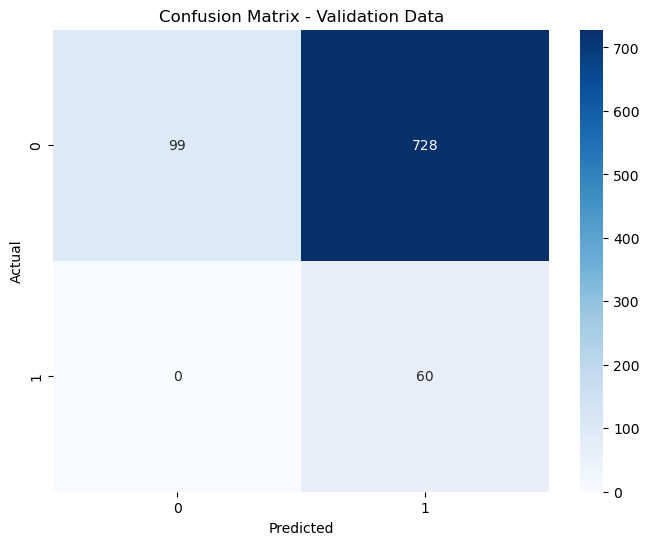

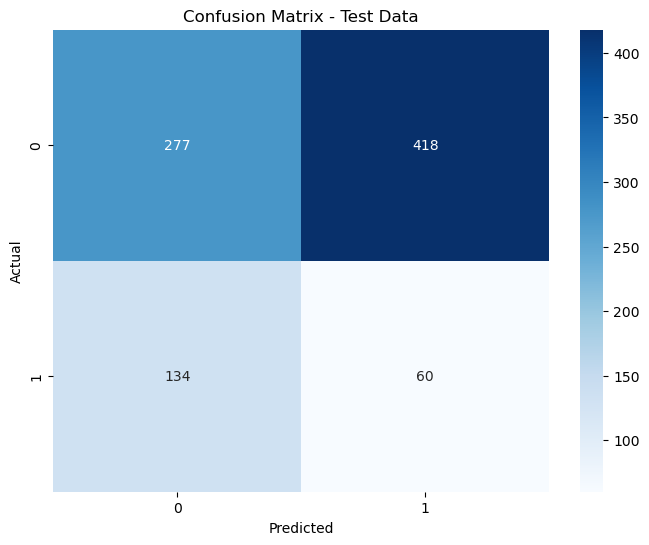

In [146]:

# Define predictors
#X = data[['date_num', 'depth', 'magnitude', 'x6', 'x7', 'meanM', 'E', 'local_b_value', 'TimeElapsed']]
#y = data[['NextWeekHighMagnitude']]

# Split the dataset into training and test sets 
# Define the size of the training, validation, and testing sets
train_size = int(0.8 * len(data))  # 70% of the data for training
val_size = int(0.1 * len(data))  # 20% of the data for validation
test_size = len(data) - train_size - val_size  # Remaining data for testing

# # Split the data into training, validation, and testing sets
train_data = data[:train_size]
val_data = data[train_size:train_size+val_size]
test_data = data[train_size+val_size:]

# # Separate the predictors (X) and the target variable (y) for each set
X_train = train_data[['date_num', 'depth', 'latitude', 'longitude', 'magnitude', 'x6', 'x7', 'meanM', 'E', 'local_b_value', 'TimeElapsed']]
y_train = train_data[['NextWeekHighMagnitude']]
y_train = y_train.values.ravel()

X_val = val_data[['date_num', 'depth', 'latitude', 'longitude', 'magnitude', 'x6', 'x7', 'meanM', 'E', 'local_b_value', 'TimeElapsed']]
y_val = val_data[['NextWeekHighMagnitude']]
y_val = y_val.values.ravel()

X_test = test_data[['date_num', 'depth', 'latitude', 'longitude', 'magnitude', 'x6', 'x7', 'meanM', 'E', 'local_b_value', 'TimeElapsed']]
y_test = test_data[['NextWeekHighMagnitude']]
y_test = y_test.values.ravel()

#Normalize dataset
scaler  = StandardScaler()
scaler.fit(X_train)

# #applying the transform on our datasets
X_train = scaler.transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# Split the dataset into training and test sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Split the training set into training and validation sets
#X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Define the parameter grid to search
param_grid = {
    'n_estimators': [200],
    'max_depth': [None, 30],
    'min_samples_split': [2, 4],
    'min_samples_leaf': [1, 3]
}

# Initialize the Random Forest Regressor
rfc = GradientBoostingClassifier()

#Initialize the GridSearchCV object
grid_search = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=5, scoring= 'recall', verbose=2)

#Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Extract best hyperparameters from 'grid_search'
best_rfc_params = grid_search.best_params_
print("Best hyperparameters:\n", best_params)

# Extract best model from 'grid_search'
best_rfc_model = grid_search.best_estimator_
print("\nBest model:\n", best_rfc_model)

y_val_pred = best_rfc_model.predict(X_val)
y_test_pred = best_rfc_model.predict(X_test)

print("Validation Accuracy:", accuracy_score(y_val, y_val_pred))
print("Test Accuracy:", accuracy_score(y_test, y_test_pred))
print('Recall Score:', recall_score(y_test, y_test_pred))

# Calculate the confusion matrix
cmv = confusion_matrix(y_val, y_val_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cmv, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Validation Data')
plt.show()

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_test_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Test Data')
plt.show()




In [147]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Define the ANN model
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(11,)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, batch_size=32)

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

# Make predictions on the test set
y_test_pred = model.predict_classes(X_test)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_test_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Test Data')
plt.show()


ModuleNotFoundError: No module named 'tensorflow'

In [34]:
# Define predictors
X = data[['latitude', 'longitude', 'depth', 'date_num']]
y = data[['magnitude']]
# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Split the training set into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

#Normalize dataset
#import StandardScaler object
# scaler  = StandardScaler()
# scaler.fit(X_train)

# #applying the transform on our datasets
# X_train = scaler.transform(X_train)
# X_val = scaler.transform(X_val)
# X_test = scaler.transform(X_test)

#initializing a random forest regressor on our dataset with standard parameters: this will be fine tuned later
# rf_model = RandomForestRegressor(n_estimators=100, random_state=42) 
# rf_model.fit(X_train, y_train)
# y_pred = rf_model.predict(X_test) 

# Define the parameter grid to search
param_grid = {
    'n_estimators': [200],
    'max_depth': [20],
    'min_samples_split': [2],
    'min_samples_leaf': [4]
}

# Initialize the Random Forest Regressor
rf_regressor = RandomForestRegressor(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf_regressor, param_grid=param_grid, 
                           scoring='neg_root_mean_squared_error', cv=5)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
best_params = grid_search.best_params_
print(f'Best Hyperparameters: {best_params}')

# Get the best model from the grid search
best_rf_model = grid_search.best_estimator_

# Make predictions on the validation set
y_val_pred = best_rf_model.predict(X_val)

# Evaluate the model on the validation set
mse_val = mean_squared_error(y_val, y_val_pred)
rmse_val = np.sqrt(mse_val)
print(f'Mean Squared Error on Validation Set: {mse_val}')
print(f'Root Mean Squared Error on Validation Set: {rmse_val}')

#Evaluate on the training set?
mse_tra = mean_squared_error(y_train, best_rf_model.predict(X_train))
rmse_tra = np.sqrt(mse_tra)
print(f'Mean Squared Error on Training Set: {mse_tra}')
print(f'Root Mean Squared Error on Training Set: {rmse_tra}')

/home/sallyfons/anaconda3/envs/instance/lib/python3.10/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/sallyfons/anaconda3/envs/instance/lib/python3.10/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/sallyfons/anaconda3/envs/instance/lib/python3.10/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/sallyfons/anaconda3/envs/instance/lib/python3.10/site-packages/sklearn/base.py:1152: DataConversionWarning: A co

Best Hyperparameters: {'max_depth': 20, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 200}
Mean Squared Error on Validation Set: 0.12823258241324026


In [35]:
#Test the model and make the predictions
y_pred = best_rf_model.predict(X_test)


EVALUATING THE MODEL

Mean Squared Error: 0.1250877383109212
R-squared: 0.3242961061151389
Root Mean Squared Error: 0.3536774495368926
Mean Squared Error on Validation Set: 0.12823258241324026
Root Mean Squared Error on Validation Set: 0.35809577268272835
Mean Squared Error on Training Set: 0.08238935269385833
Root Mean Squared Error on Training Set: 0.28703545546475323


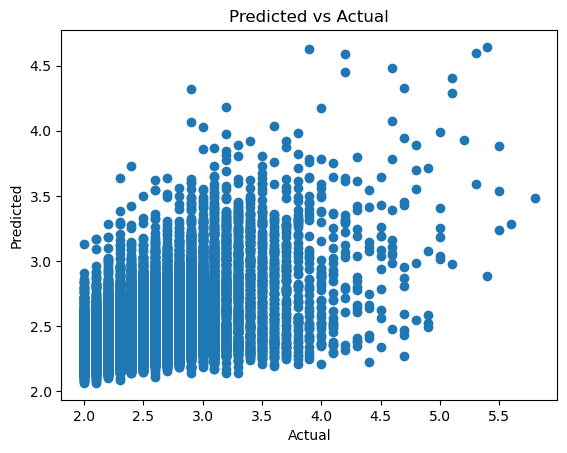

In [38]:
# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
# Calculate the R2 score
r2 = r2_score(y_test, y_pred)
#Calculating the RMSE
rmse = np.sqrt(mse)
#Calculating MAPE
#mape = np.mean(np.abs((y_test - y_pred)/y_test))*100

# Print the metrics
print("Mean Squared Error:", mse)
print(f'R-squared: {r2}')
print(f'Root Mean Squared Error: {rmse}')
#print(f'Mean Absolute Percentage Error: {mape}')

# Evaluate the model on the validation set
mse_val = mean_squared_error(y_val, y_val_pred)
rmse_val = np.sqrt(mse_val)
print(f'Mean Squared Error on Validation Set: {mse_val}')
print(f'Root Mean Squared Error on Validation Set: {rmse_val}')

#Evaluate on the training set?
mse_tra = mean_squared_error(y_train, best_rf_model.predict(X_train))
rmse_tra = np.sqrt(mse_tra)
print(f'Mean Squared Error on Training Set: {mse_tra}')
print(f'Root Mean Squared Error on Training Set: {rmse_tra}')

# Create a scatter plot of y_pred vs y_test
plt.scatter(y_test, y_pred)

# Set the plot title and axis labels
plt.title('Predicted vs Actual')
plt.xlabel('Actual')
plt.ylabel('Predicted')

# Show the plot
plt.show()


CALCULATING GUTENBERG-RICHTER VALUES

a value: 6.556794346789255
b value: -1.0702480300407853
coefficients: [-1.07024803  6.55679435]


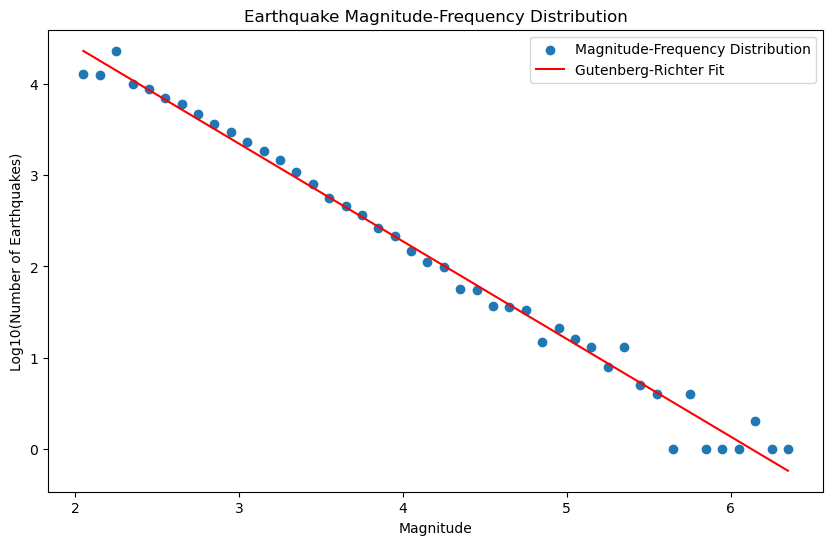

In [10]:
#Count number of earthquakes for each magnitude & extract vaues from midpoint of bins
mag_counts, mag_bins = np.histogram(data['magnitude'], bins=np.arange(data['magnitude'].min(), data['magnitude'].max(), 0.1))
mag_values = (mag_bins[:-1] + mag_bins[1:]) / 2

# Perform linear regression on the log-transformed data
log_mag_counts = np.log10(np.where(mag_counts > 0, mag_counts, 1))

# Fit a linear function to the log-transformed data
coeff = np.polyfit(mag_values, log_mag_counts, 1)
b, a = coeff

# Display the results
print(f"a value: {a}")
print(f"b value: {b}")
print(f"coefficients: {coeff}")

# Plot the earthquake magnitude-frequency distribution
plt.figure(figsize=(10, 6))
plt.scatter(mag_values, log_mag_counts, label='Magnitude-Frequency Distribution')
plt.xlabel('Magnitude')
plt.ylabel('Log10(Number of Earthquakes)')
plt.title('Earthquake Magnitude-Frequency Distribution')

# Plot the fitted curve
plt.plot(mag_values, a + b * mag_values, color='red', label='Gutenberg-Richter Fit')

# Display the legend
plt.legend()

# Show the plot
plt.show()
